# [Exloratory] 인공지능과 가위바위보 하기

## 딥러닝 기술
__데이터 준비 > 딥러닝 네트워크 설계 > 학습 > 테스트(평가)__

# 1. 데이터 준비
## 1) MNIST 숫자 손글씨 Dataset 불러들이기
- TensorFlow의 표준 API tf.keras의 Sequential API활용
- TensorFlow: 머신러닝 라이브러리 중 하나

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # Tensorflow 버전
print()

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train)) # x_train 배열의 크기

2.0.0

60000


숫자 손글씨 데이터베이스인 MNIST 데이터셋을 출력해왔다.

- MNIST데이터셋(by.Yann Lecun 교수): http://yann.lecun.com/exdb/mnist/

##### 숫자 손글씨 이미지의 크기는 무엇일까? "nxn"(n은 정수)의 형태 로 답변
- 28x28

##### MNIST dataset에는 총 몇 장의 손글씨 이미지가 있을까?
- 학습 이미지: 60,000장
- 테스트 이미지가 10,000장
- 총 70,000장

##### MNIST 데이터셋의 X항목(위 코드에서는 x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)임

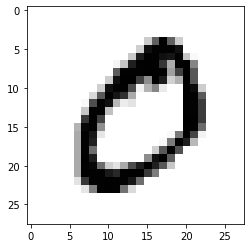

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

#### 주의할 점:
-  위의 x_train[1]에 담긴 이미지는 x_train 행렬의 1번째가 아니라 2번째 이미지라는 점이다.
- 1번째 이미지는 x_train[0]에 담겨 있다.

##### Y항목에는 어떤 값이 들어 있을까? 
다음은, y_train 행렬의 2번째 값이다.

In [3]:
print(y_train[1])

0


Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자값이 담겨 있는 것을 확인하실 수 있다.

#### 다른 이미지 출력하기

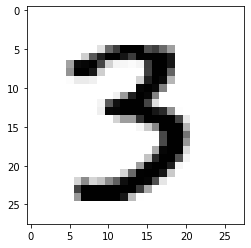

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보자.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

#### 참고: Matplotlib 
- 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공한다.
- 어떤 유용한 기능이 제공되는지 Matplotlib 공식홈페이지에서 제공하는 다양한 활용 예제들을 통해 직접 확인해 볼 수 있다.
- 주소: https://matplotlib.org/2.0.2/gallery.html

### 학습용 데이터와 시험용 데이터

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- mnist.load() 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있다.

- 우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시킨다. 

- 이 손글씨 분류기가 얼마나 좋은 성능을 가지고 있는지 확인해보고 싶을 때, 시험용 데이터 (x_test, y_test)로 테스트 할 수 있다.

MNIST 데이터셋은 약 500명의 사용자가 작성한 숫자 이미지를 가지고 있다. 그 중 250여명은 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용된다.

##### [학습용 데이터(training set)와 시험용 데이터(test set)의 예]
- 학습용 데이터 몇 장일까?

In [6]:
print(x_train.shape)

(60000, 28, 28)


28x28 크기의 숫자 이미지가 6만장이 있다는 뜻이다.

- 시험용 데이터 몇 장일까?

In [7]:
print(x_test.shape)

(10000, 28, 28)


In [8]:
print(y_train.shape)

(60000,)


In [9]:
print(y_test.shape)

(10000,)


만장의 시험용 데이터가 저장되어 있다.

##### 학습용 데이터, 검증용 데이터 그리고 시험용 데이터의 의미와 차이점
- 주소: https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

## 2) 언제 검증용 데이터(validataion set)을 사용하나?
- 머신러닝 학습 과정이 정상적으로 진행되고 있는가 여부
- 오버피팅이 발생하고 있지는 않는지 여부
- 학습을 중단해도 되는지 등의 여부를 확인하고 싶을 때

## 3) 교차 검증(cross validation) 기법
- 고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합 되어버리는 결과가 생긴다.
- 이를 해결하고자 하는 것이 교차 검증 기법이다.
- 교차 검증은 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않는다.

- 참고1: https://m.blog.naver.com/ckdgus1433/221599517834
- 참고2: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-10-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EA%B3%BC-%ED%8F%89%EA%B0%80-Cross-Validation-and-Evaluation

## 4) 데이터 전처리

- 숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 갖는다.

In [10]:
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


- 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜준다. 
- MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누어주면 된다.

##### 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해보자.

In [11]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


* 튜플 형식은 괄호생략이 가능하다. (x, y) = (x/255, y/255)

# 3. 딥러닝 네트워크 설계
- 목적: 빠르게 다양한 응용 예들을 접해보고, 주진 코드를 다른 데이터에 활용 해본다.
## Sequenential Model 사용하기
- 데이터가 모두 준비가 되었다면 "딥러닝 네트워크"를 만들어야 한다. 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용할 것인데, Sequential API는 개발의 자유도는 많이 떨어지나 간단하게 딥러닝 모델을 만들어 낼 수 있는 방법이다.

- 케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functilanal API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등이 있다.

##### [tf.keras의 Sequential API를 이용하여  LeNet이라는 딥러닝 네트워크 설계한 예]

In [12]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))

model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


이런 간단한 코드만으로도 숫자 손글씨를 인식해 낼 수 있다면, IoT 농장에서 귤이 잘 익었는지 아닌지 판단한다거나, 사진 속 인물이 웃고 있는지 무표정한지 파악을 하는 것도 가능할 것!

## 위 코드의 의미
- Conv2D: 첫번째 인자는 사용하는 이미지 특징의 개수. 여기서는 16장과 32장을 사용했다. 
   - 우리의 숫자 이미지는 단순한 형태의 이미지다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것. 그럴 경우에는 이 특징 숫자를 늘려주는 것이 좋다.
   - 16, 32: 얼마나 다양한 이미지의 특징을 살펴볼 것인가? 입력 이미지가 다양할수록 더 많은 특징을 고려할 수 있다.
   
   
- Dense: 첫번째 인자는 분류기에 사용되는 뉴런의 숫자다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다. 10개의 숫자가 아닌 알파벳으로 구분하고 싶다면 대문자 26개, 소문자 26로 총 52개의 클래스를 분류해낸다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있다.
   - 32: 분류기 알고리즘을 얼마나 복잡하게 할 것인가? 복잡한 문제일수록 이 수를 늘려보자
   
   
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 된다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 된다.
   - 10: 최종 분류기의 class 수. 여기서는 0-9까지 총 10개의 class를 구분하므로 10.


- input_shape는 입력 이미지의 형태다.

### 딥러닝 네트워크 모델을 확인한다면?

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 4. 딥러닝 네트워크 학습시키기 
- 우리가 만든 네트워크 입력:\
(데이터 갯수, 이미지 크기 x, 이미지 크기 y, 채널수)
     - input_shape=(28,28,1)로 지정했었음


- 그런데 print(x_train.shape)를 해보면 (60000, 28, 28)로 채널수에 대한 정보가 없다. 따라서 (60000, 28, 28, 1)로 만들어 주어야 함.
     - 여기서 채널수 1은 흑백 이미지를 의미, 컬러라면 R, G, B 세 가지 값이 있기에 3이 됨.
     
     
- __Keyword: fit(), epochs, shape, reshape__

In [14]:
print(x_train.shape) # 채널수 정보가 없음

(60000, 28, 28)


In [15]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터 개수에 -1을 쓰면 reshape시 자동 계산 됨
x_train_reshaped = x_train_norm.reshape(-1, 28,28,1)
x_test_reshaped = x_test_norm.reshape(-1, 28,28,1)

print()

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)

After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


##### x_train 학습 데이터로 딥러닝 네트워크를 학습시켜보자.
- eopchs = 10: 전체 6만개의 데이터를 10번 반복 사용해서 학습시키라는 의미
     - model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용되어야 함

In [16]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2084 - accuracy: 0.9390
Epoch 2/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0716 - accuracy: 0.9779
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0534 - accuracy: 0.9841
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0423 - accuracy: 0.9871
Epoch 5/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0349 - accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.0292 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0244 - accuracy: 0.9922
Epoch 8/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.0195 - accuracy: 0.9938
Epoch 9/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0171 - accuracy: 0.9

- 각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인이 가능하다.
- 인식 정확도가 0.9390에서 0.9953까지 나옴
- 9 epoch 정도부터는 인식률의 상승이 미미하다. 
- 10 epoch 정도 학습을 시키면 충분할 것 같다.

# 5. 얼마나 잘 만들었는지 확인하기
### 테스트 데이터로 성능을 확인하기
위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것이다. 즉 연습 문제를 잘 푸는 인공지능을 만든 거다. 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있는지 확인해보자.


- __Keyword: loss, accuracy__

#### x_test 시험용 데이터로 딥러닝 네트워크를 학인해보자.

In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10000/1 - 1s - loss: 0.0186 - accuracy: 0.9904
test_loss: 0.03713349520661432
test_accuracy: 0.9904000163078308


- 학습용 데이터로 얻은 99,53점이 아닌 99.04로 시험점수가 소폭 하락했다. 
- MNIST 데이터셋 참고문헌을 보면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있다. 즉, 한번도 본 적이 없는 필체의 손글씨가 섞여있을 수 있다. 어찌보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일이었다.

### 어떤 데이터를 잘못 추론했을까? 눈으로 확인하기.

- model.evaluate() 대신 model.predict()를 사용하면 model 입력값을 보고 실제로 추론한 확률 분포를 출력할 수 있다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다.
- 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자다.

In [18]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0 #1번째 x_test를 살펴보자.

print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9344812e-12 2.4433373e-06 8.9692429e-07 4.0503514e-06 2.2073658e-09
 4.3522790e-09 3.8692157e-14 9.9998963e-01 2.7595114e-08 2.9957612e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


- model.predict() 결과가 백터의 형태임
- 이 백터는 model이 추론한 결과가 각각 0,1,2,3,4,5,6,7,8,9일 확률을 의미
- model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다. 즉, 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이다.

##### 정말 숫자 7일까?

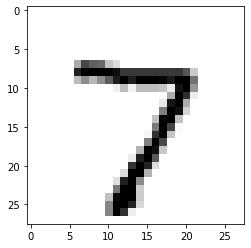

In [19]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

#### model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우일까?

예측확률분포:[2.5607910e-11 9.8126121e-09 1.8979751e-08 7.6458663e-02 6.1527780e-06
 5.0580716e-01 1.1340712e-10 6.8355099e-08 4.8677794e-07 4.1772750e-01]
라벨: 9, 예측결과: 5


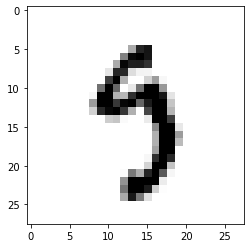

예측확률분포:[8.0999367e-09 5.5397988e-09 5.4817187e-06 9.0722102e-01 5.1180651e-09
 7.1340492e-03 8.2671824e-16 3.4492262e-09 2.8337381e-05 8.5611120e-02]
라벨: 9, 예측결과: 3


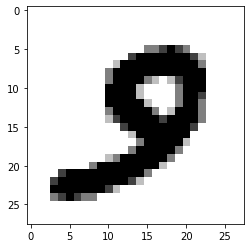

예측확률분포:[9.5399644e-10 1.2744705e-11 8.6072055e-10 2.3892699e-09 7.5661006e-07
 1.3392375e-08 3.6519919e-11 1.4297711e-07 6.2893689e-01 3.7106219e-01]
라벨: 9, 예측결과: 8


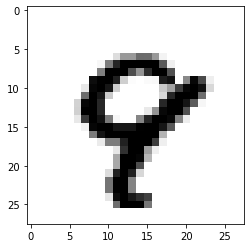

예측확률분포:[2.5271904e-06 5.8810844e-08 3.2162362e-07 2.6562279e-08 7.4718286e-05
 2.0714165e-08 3.1494460e-10 8.0654424e-08 2.4580756e-02 9.7534150e-01]
라벨: 8, 예측결과: 9


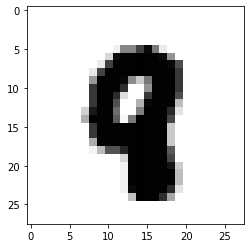

예측확률분포:[3.7256996e-05 3.4673327e-11 3.8082387e-06 2.0844493e-06 2.0454020e-06
 1.2012206e-04 1.6267312e-11 6.1850078e-06 4.1588011e-01 5.8394837e-01]
라벨: 8, 예측결과: 9


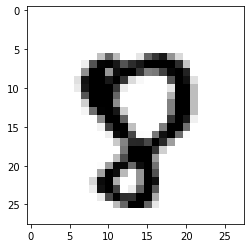

In [20]:
import random
wrong_predict_list=[]

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아보기
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포:"+str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
          
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다.
- model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나이다.

# 6. 더 좋은 네트워크 만들기

##### 인식률을 다시 99점대로 만들 수 있을까?
- 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있다.
- 하이퍼파라미터들을 바꾸면 된다.
     - Conv2D: 입력의미지의 특정 수를 늘리거나 줄여 보거나,
     - Dense: 뉴런수를 바꾸어 보거나,
     - epoch: 학습 반복 횟수 값을 변경 할 수 있다.
     
    
- __바꿔볼 수 있는 하이퍼파라미터: n_channel_1, n_channel_2, n_dense, n_train_epoch__

In [21]:
# 바꿔볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# 7. 프로젝트: 가위바위보 분류기 만들기
## 데이터를 준비하자
### 데이터 만들기
(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장 만들기. 

##### 그런데 300장을 어느 세월에 만들까?
- 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있다. 아래 사이트에서 Get Started 버튼을 눌러 보고, Image Project를 선택하면 Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타난다.
- 주소: https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 보다. 웹캠 앞에 가위 포즈를 취하면서 버튼을 누르면 이미지가 캡쳐된다.
- 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어야 한다.
- 여러 각도에서 찍어보자.
- 여러 크기로 찍어보자.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하는게 좋다.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하자.

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 한다.


(4) 가위 이미지 100장을 모두 저장 했다면, 바위 및 보 이미지에 대해서도 위 과정을 진행하세요. 가위는 scissor 폴더에, 바위는 rock 폴더에, 보는 paper 폴더에 각각 압축을 풀어 봅시다. 각 폴더안에 100개의 이미지가 들어있다면 성공한다.

추후 프로그램 작성의 통일성을 위해, rock_scissor_paper 라는 폴더 아래에 scissor, rock, paper 폴더를 만들어서 이미지를 저장하자. 각 이미지는 아래 폴더 안에 들어가야 한다.

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 가위, 바위, 보 이미지도 28x28로 만들어야 한다. 이를 위해서는 PIL 라이브러리를 사용한다.

In [22]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow
from PIL import Image

import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 잠깐, path 잡기

##### path 잡기 진행한 순서대로 참고 링크:
1. 파이썬에서 환경변수 읽기: https://www.delftstack.com/ko/howto/python/how-to-access-environment-variables-in-python/
2. 환경변수 얻는 방법: https://uzooin.tistory.com/147
3. 환경변수와 path 참고: https://m.blog.naver.com/zxwnstn/221521038431

In [23]:
os.environ # 사용자로 되어있는 키값 찾기

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\User\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-IE8KBFV',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'py3_7_6',
        'CONDA_EXE': 'C:\\ProgramData\\Anaconda3\\Scripts\\conda.exe',
        'CONDA_PREFIX': 'C:\\ProgramData\\Anaconda3\\envs\\py3_7_6',
        'CONDA_PREFIX_1': 'C:\\ProgramData\\Anaconda3',
        'CONDA_PROMPT_MODIFIER': '(py3_7_6) ',
        'CONDA_PYTHON_EXE': 'C:\\ProgramData\\Anaconda3\\python.exe',
        'CONDA_SHLVL': '2',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
        'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
        'HOMEDRIVE': 'C:',
   

In [24]:
os.getenv("HOMEPATH") # HOMEPATH와 USERPROFILE 중 HOMEPATH를 선택함
print(os.getenv("HOMEPATH"))

\Users\User


In [25]:
pwd # 참고로 현재 작성 중인 경로

'C:\\Users\\User\\Desktop\\class'

In [26]:
import os

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper/scissors"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  \Users\User/Desktop/class/rock_scissor_paper/scissors
가위 이미지 resize 완료!


- 바위 이미지를 불러와서 28x28 사이즈로 변경

In [27]:
import os

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  \Users\User/Desktop/class/rock_scissor_paper/rock
바위 이미지 resize 완료!


- 보 이미지를 불러와서 28x28 사이즈로 변경

In [28]:
import os

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  \Users\User/Desktop/class/rock_scissor_paper/paper
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었다.

- 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있다.
- load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받는다.
- 숫자 손글씨는 0~9 까지의 클래스가 있었는데, 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것이다.

In [29]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 # 가위바위보 이미지 개수 총합 주의
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


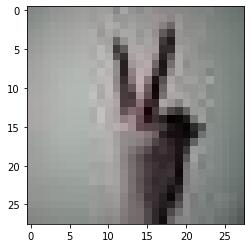

In [30]:
# 불러온 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

__네트워크 설계 중 주의: Sequential, Conv2D, MaxPool2D, Flatten, Dense__ 

In [31]:
# 네트워크 설계
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 15

# 모델 생성
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

__모델 학습 중 주의: compile(loss, optimizer, metrics), fit(x_train, y_train, epochs)__

In [32]:
# 모델 학습
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Train on 300 samples
Epoch 1/15
300/300 [==============================] - 1s 2ms/sample - loss: 1.1047 - accuracy: 0.3033
Epoch 2/15
300/300 [==============================] - 0s 289us/sample - loss: 1.0560 - accuracy: 0.4300
Epoch 3/15
300/300 [==============================] - 0s 381us/sample - loss: 1.0084 - accuracy: 0.6100
Epoch 4/15
300/300 [==============================] - 0s 319us/sample - loss: 0.8996 - accuracy: 0.7033
Epoch 5/15
300/300 [==============================] - 0s 310us/sample - loss: 0.7450 - accuracy: 0.8967
Epoch 6/15
300/300 [==============================] - 0s 332us/sample - loss: 0.5848 - accuracy: 0.8333
Epoch 7/15
300/300 [==============================] - 0s 349us/sample - loss: 0.4508 - accuracy: 0.8767
Epoch 8/15
300/300 [==============================] - 0s 336us/sample - loss: 0.3507 - accuracy: 0.9200
Epoch 9/15
300/300 [==============================] - 0s 342us/sample - loss: 0.2790 - accuracy: 0.9400
Epoch 10/15
300/300 [========================

In [33]:
# 테스트 이미지
image_dir_path = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


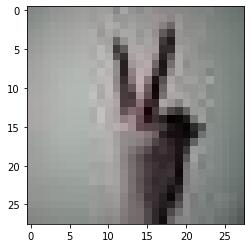

In [34]:
# 불러온 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [39]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

300/1 - 0s - loss: 0.0606 - accuracy: 0.9767
test_loss: 0.11871701433944205 
test_accuracy: 0.9766666889190674


#### 딥러닝 네트워크 설계하기
- 하이퍼 파라미터 튜닝: https://sy-programmingstudy.tistory.com/9

# 8. for문으로 한번에 resize하는 법

Model Picture 폴더 /Rock, /Paper, /Scissor 아래에 가위바위보 사진이 라벨 별로 들어가 있으니, 한번에 리사이징할 수 있도록 코드를 변경한다.

In [40]:
# image_directory = os.getenv("HOMEPATH") + "/Desktop/class/rock_scissor_paper"
# path_pool = "/Rock", "/Scissor", "/Paper"
# target_size=(28, 28)

# for path in path_pool:
#     images=glob.glob(image_directory + path + "/*.jpg")
    
#     for img in images:
#         old_img=Image.open(img)
#         new_img=old_img.resize(target_size, Image.ANTIALIAS)
#         new_img.save(img, "JPEG")
# print("리사이징 완료")

--- seYi